#Zasoby

* Make predictions with imported TensorFlow models

* https://cloud.google.com/bigquery/docs/e2e-journey
* https://cloud.google.com/bigquery/docs/making-predictions-with-imported-tensorflow-models
* https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-tensorflow

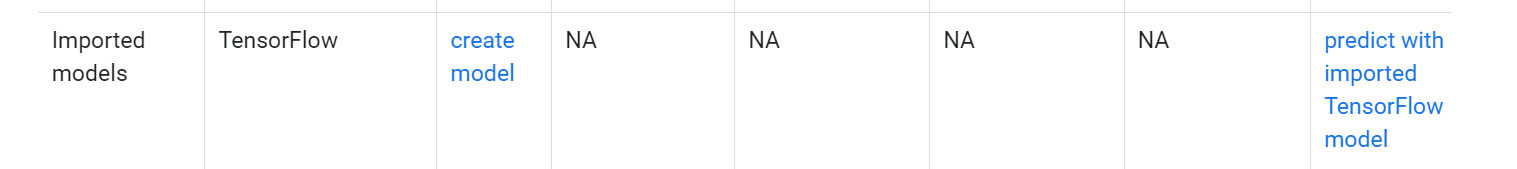

#Cele

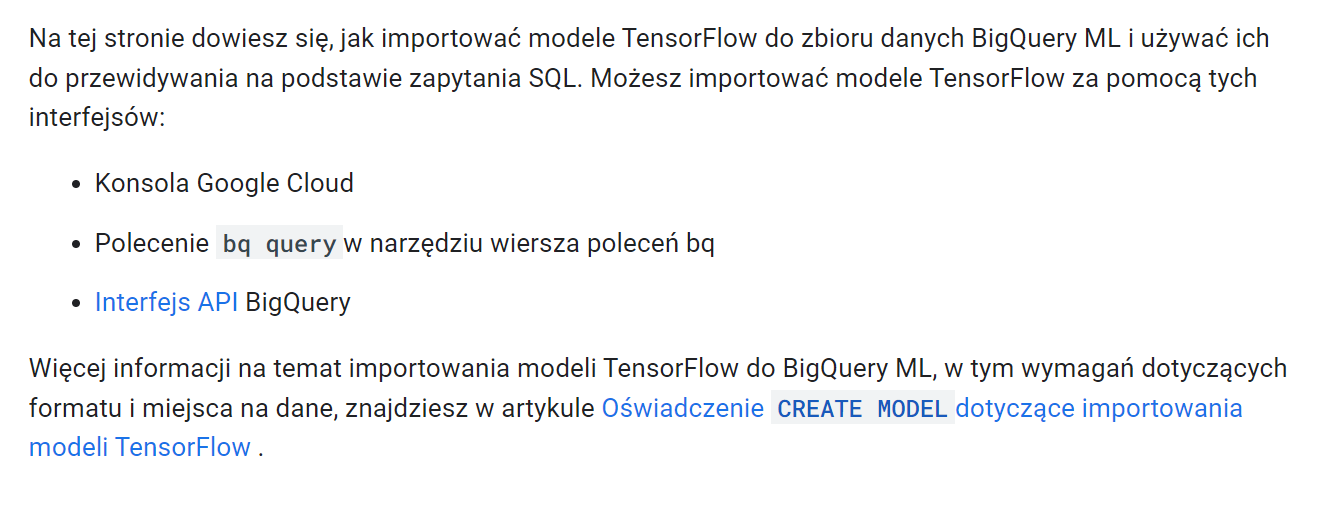

#Importuj modele TensorFlow (Krok 1)

In [ ]:
%%bigquery

 CREATE OR REPLACE MODEL pmackowka_us.model_0161
  OPTIONS (MODEL_TYPE='TENSORFLOW',
   MODEL_PATH='gs://cloud-training-demos/txtclass/export/exporter/1549825580/*')

In [ ]:
%%bigquery / wiersz poleceń

bq query --use_legacy_sql=false \
"CREATE OR REPLACE MODEL
  pmackowka_us.model_0162
OPTIONS
  (MODEL_TYPE='TENSORFLOW',
    MODEL_PATH='gs://cloud-training-demos/txtclass/export/exporter/1549825580/*')"

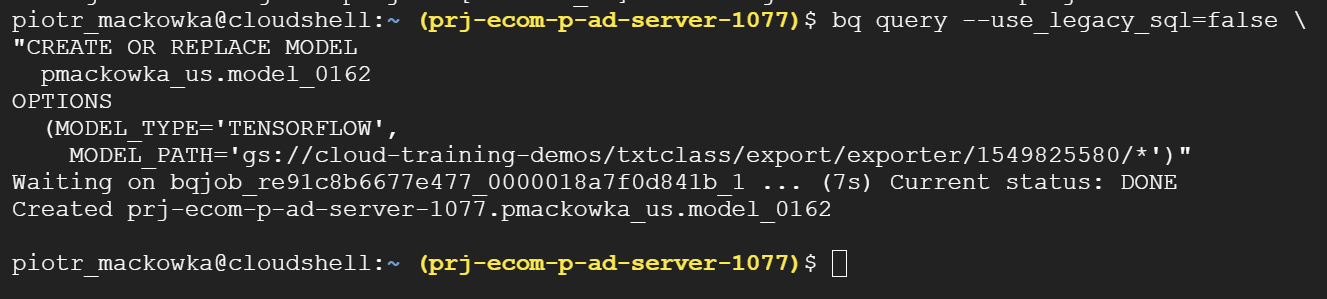

#Twórz prognozy za pomocą importowanych modeli TensorFlow (Krok 2)

* W tym przypadku funkcja modelu TensorFlow `serving_input_fn` określa, że ​​model oczekuje pojedynczego ciągu wejściowego o nazwie input, więc podzapytanie przypisuje alias input do kolumny w SELECT instrukcji podzapytania.

* Każda wartość elementu tablicy reprezentuje prawdopodobieństwo, że odpowiedni ciąg wejściowy jest tytułem artykułu z określonej publikacji.

In [ ]:
%%bigquery

 SELECT *
   FROM ML.PREDICT(MODEL pmackowka_us.model_0161,
     (
      SELECT title AS input
      FROM bigquery-public-data.hacker_news.full
     )
 )


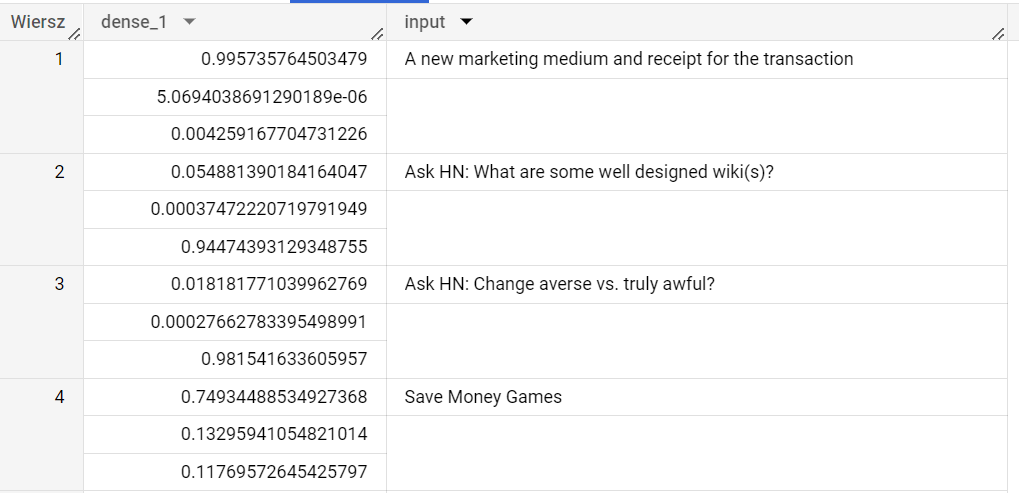

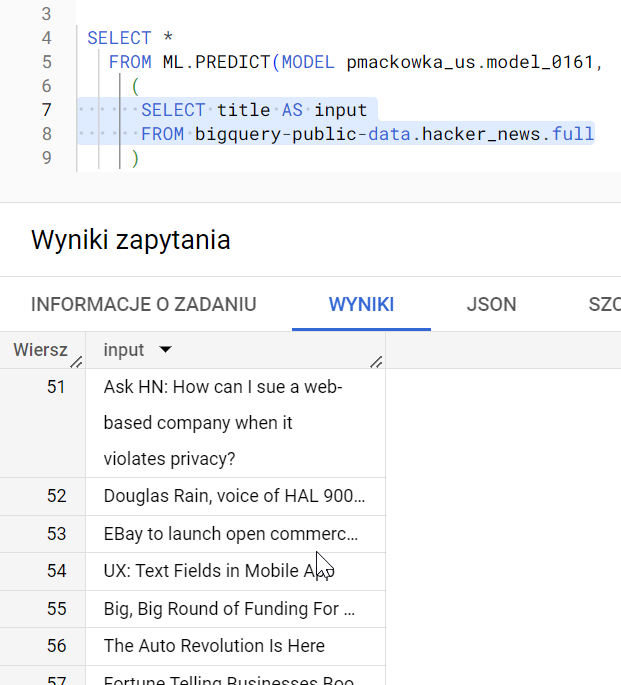